# Final Project
Tackling Long-Tail Distribution Problem

## 0. Base Setting

In [1]:
import torch, torchvision
import torch.nn as nn

## 1. Dataset Load

In [ ]:
torch.manual_seed(42)

In [2]:
from data.dataset import get_dataloader

train_loader, test_loader = get_dataloader(mode = "unbalanced")

In [3]:
class MyResNet18 (nn.Module):
    def __init__(self, num_classes=100, pretrained=False):
        super(MyResNet18, self).__init__()
        self.backbone = torchvision.models.resnet18(pretrained=pretrained)
        
        in_features = self.backbone.fc.in_features
        self.backbone.fc = nn.Linear(in_features, num_classes)    
        # CIFAR-100에 맞게 fc_layer output channel 100으로 교체
        
    def forward(self, x):
        x = self.backbone(x)
        return x
    
model = MyResNet18()
print(model)

MyResNet18(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

d:\code\DeepLearningLab\Final_Project\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\code\DeepLearningLab\Final_Project\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
from torch.optim.lr_scheduler import LambdaLR
from losses.loss import myLoss

epochs = 90
learning_rate = 0.025
weight_decay = 5e-4

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, weight_decay=weight_decay)
criterion = myLoss(mode="CrossEntropy")
scheduler = LambdaLR(optimizer, lr_lambda=lambda epoch: 1 - (epoch/epochs))

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print(device)

cuda:0


In [6]:
def test_loss_cal(model, test_loader, criterion, device):
    model.eval()
    test_loss = 0.0
    count = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            count += 1
    test_loss = test_loss / count
    model.train()
    return test_loss

In [7]:
import os
from tqdm import tqdm
os.makedirs('./models', exist_ok=True)

train_losses = list()
test_losses = list()

model_save_path = "./models/Base_unbalanced.pth"
best_loss = float('inf')

model.train()
interval = max(1, len(train_loader) // 5)
for epoch in range(epochs):
    total_loss = 0.0
    for image, label in tqdm(train_loader):
        image = image.to(device)
        label = label.to(device)
        
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    test_loss = test_loss_cal(model, test_loader, criterion, device)
    print(f"[epoch {epoch+1}] train_loss: {total_loss/len(train_loader):.4f}, test_loss: {test_loss:.4f}")
    train_losses.append(total_loss/len(train_loader))
    test_losses.append(test_loss)
    if test_loss < best_loss:
        best_loss = test_loss
        torch.save(model.state_dict(), model_save_path)
        print("[Best Model Saved!]")

100%|██████████| 394/394 [01:10<00:00,  5.61it/s]


[epoch 1] train_loss: 4.0892, test_loss: 4.0846
[Best Model Saved!]


100%|██████████| 394/394 [01:02<00:00,  6.26it/s]


[epoch 2] train_loss: 3.7500, test_loss: 3.8935
[Best Model Saved!]


100%|██████████| 394/394 [01:02<00:00,  6.30it/s]


[epoch 3] train_loss: 3.5918, test_loss: 3.7588
[Best Model Saved!]


100%|██████████| 394/394 [01:03<00:00,  6.20it/s]


[epoch 4] train_loss: 3.4458, test_loss: 3.7090
[Best Model Saved!]


100%|██████████| 394/394 [01:08<00:00,  5.79it/s]


[epoch 5] train_loss: 3.3300, test_loss: 3.5893
[Best Model Saved!]


100%|██████████| 394/394 [01:12<00:00,  5.41it/s]


[epoch 6] train_loss: 3.1970, test_loss: 3.6880


100%|██████████| 394/394 [01:06<00:00,  5.90it/s]


[epoch 7] train_loss: 3.0613, test_loss: 3.3432
[Best Model Saved!]


100%|██████████| 394/394 [01:05<00:00,  6.05it/s]


[epoch 8] train_loss: 2.9436, test_loss: 3.3674


100%|██████████| 394/394 [01:08<00:00,  5.77it/s]


[epoch 9] train_loss: 2.8310, test_loss: 3.4412


100%|██████████| 394/394 [01:14<00:00,  5.30it/s]


[epoch 10] train_loss: 2.7249, test_loss: 3.2695
[Best Model Saved!]


100%|██████████| 394/394 [01:09<00:00,  5.64it/s]


[epoch 11] train_loss: 2.6257, test_loss: 3.1203
[Best Model Saved!]


100%|██████████| 394/394 [01:12<00:00,  5.44it/s]


[epoch 12] train_loss: 2.5460, test_loss: 3.0447
[Best Model Saved!]


100%|██████████| 394/394 [01:07<00:00,  5.81it/s]


[epoch 13] train_loss: 2.4569, test_loss: 3.0489


100%|██████████| 394/394 [01:07<00:00,  5.84it/s]


[epoch 14] train_loss: 2.3726, test_loss: 2.8957
[Best Model Saved!]


100%|██████████| 394/394 [01:04<00:00,  6.15it/s]


[epoch 15] train_loss: 2.2999, test_loss: 2.8233
[Best Model Saved!]


100%|██████████| 394/394 [01:04<00:00,  6.15it/s]


[epoch 16] train_loss: 2.2509, test_loss: 2.8008
[Best Model Saved!]


100%|██████████| 394/394 [01:03<00:00,  6.16it/s]


[epoch 17] train_loss: 2.1708, test_loss: 2.6377
[Best Model Saved!]


100%|██████████| 394/394 [01:03<00:00,  6.16it/s]


[epoch 18] train_loss: 2.1112, test_loss: 2.7962


100%|██████████| 394/394 [01:04<00:00,  6.13it/s]


[epoch 19] train_loss: 2.0647, test_loss: 2.8488


100%|██████████| 394/394 [01:04<00:00,  6.14it/s]


[epoch 20] train_loss: 2.0208, test_loss: 2.5768
[Best Model Saved!]


100%|██████████| 394/394 [01:03<00:00,  6.18it/s]


[epoch 21] train_loss: 1.9693, test_loss: 2.5045
[Best Model Saved!]


100%|██████████| 394/394 [01:04<00:00,  6.06it/s]


[epoch 22] train_loss: 1.9264, test_loss: 2.5307


100%|██████████| 394/394 [01:04<00:00,  6.09it/s]


[epoch 23] train_loss: 1.8940, test_loss: 2.4386
[Best Model Saved!]


100%|██████████| 394/394 [01:04<00:00,  6.07it/s]


[epoch 24] train_loss: 1.8474, test_loss: 2.4408


100%|██████████| 394/394 [01:05<00:00,  6.03it/s]


[epoch 25] train_loss: 1.8058, test_loss: 2.4512


100%|██████████| 394/394 [01:04<00:00,  6.08it/s]


[epoch 26] train_loss: 1.7786, test_loss: 2.4555


100%|██████████| 394/394 [01:04<00:00,  6.06it/s]


[epoch 27] train_loss: 1.7404, test_loss: 2.5189


100%|██████████| 394/394 [01:04<00:00,  6.07it/s]


[epoch 28] train_loss: 1.7108, test_loss: 2.5354


100%|██████████| 394/394 [01:05<00:00,  6.05it/s]


[epoch 29] train_loss: 1.6680, test_loss: 2.3000
[Best Model Saved!]


100%|██████████| 394/394 [01:05<00:00,  6.05it/s]


[epoch 30] train_loss: 1.6591, test_loss: 2.2864
[Best Model Saved!]


100%|██████████| 394/394 [01:04<00:00,  6.09it/s]


[epoch 31] train_loss: 1.6176, test_loss: 2.2595
[Best Model Saved!]


100%|██████████| 394/394 [01:05<00:00,  6.06it/s]


[epoch 32] train_loss: 1.5922, test_loss: 2.2087
[Best Model Saved!]


100%|██████████| 394/394 [01:05<00:00,  6.04it/s]


[epoch 33] train_loss: 1.5560, test_loss: 2.3516


100%|██████████| 394/394 [01:05<00:00,  6.03it/s]


[epoch 34] train_loss: 1.5396, test_loss: 2.2245


100%|██████████| 394/394 [01:05<00:00,  6.03it/s]


[epoch 35] train_loss: 1.5055, test_loss: 2.5076


100%|██████████| 394/394 [01:05<00:00,  6.01it/s]


[epoch 36] train_loss: 1.4959, test_loss: 2.3442


100%|██████████| 394/394 [01:04<00:00,  6.07it/s]


[epoch 37] train_loss: 1.4553, test_loss: 2.2155


100%|██████████| 394/394 [01:05<00:00,  6.04it/s]


[epoch 38] train_loss: 1.4368, test_loss: 2.2412


100%|██████████| 394/394 [01:05<00:00,  6.05it/s]


[epoch 39] train_loss: 1.4134, test_loss: 2.2582


100%|██████████| 394/394 [01:04<00:00,  6.07it/s]


[epoch 40] train_loss: 1.3992, test_loss: 2.2296


100%|██████████| 394/394 [01:05<00:00,  6.00it/s]


[epoch 41] train_loss: 1.3812, test_loss: 2.1920
[Best Model Saved!]


100%|██████████| 394/394 [01:05<00:00,  6.04it/s]


[epoch 42] train_loss: 1.3562, test_loss: 2.1731
[Best Model Saved!]


100%|██████████| 394/394 [01:05<00:00,  6.05it/s]


[epoch 43] train_loss: 1.3363, test_loss: 2.1578
[Best Model Saved!]


100%|██████████| 394/394 [01:05<00:00,  6.06it/s]


[epoch 44] train_loss: 1.3210, test_loss: 2.1222
[Best Model Saved!]


100%|██████████| 394/394 [01:05<00:00,  6.05it/s]


[epoch 45] train_loss: 1.3061, test_loss: 2.1989


100%|██████████| 394/394 [01:07<00:00,  5.85it/s]


[epoch 46] train_loss: 1.2759, test_loss: 2.1804


100%|██████████| 394/394 [01:06<00:00,  5.91it/s]


[epoch 47] train_loss: 1.2572, test_loss: 2.3278


100%|██████████| 394/394 [01:08<00:00,  5.79it/s]


[epoch 48] train_loss: 1.2295, test_loss: 2.1392


100%|██████████| 394/394 [01:04<00:00,  6.12it/s]


[epoch 49] train_loss: 1.2239, test_loss: 2.1555


100%|██████████| 394/394 [01:03<00:00,  6.16it/s]


[epoch 50] train_loss: 1.2207, test_loss: 2.0591
[Best Model Saved!]


100%|██████████| 394/394 [01:07<00:00,  5.84it/s]


[epoch 51] train_loss: 1.1973, test_loss: 2.0996


100%|██████████| 394/394 [01:05<00:00,  6.05it/s]


[epoch 52] train_loss: 1.1814, test_loss: 2.1190


100%|██████████| 394/394 [01:04<00:00,  6.07it/s]


[epoch 53] train_loss: 1.1728, test_loss: 2.1885


100%|██████████| 394/394 [01:04<00:00,  6.06it/s]


[epoch 54] train_loss: 1.1582, test_loss: 2.0764


100%|██████████| 394/394 [01:06<00:00,  5.91it/s]


[epoch 55] train_loss: 1.1551, test_loss: 2.0972


100%|██████████| 394/394 [01:05<00:00,  6.04it/s]


[epoch 56] train_loss: 1.1240, test_loss: 2.1287


100%|██████████| 394/394 [01:05<00:00,  6.02it/s]


[epoch 57] train_loss: 1.1235, test_loss: 2.1599


100%|██████████| 394/394 [01:05<00:00,  6.06it/s]


[epoch 58] train_loss: 1.1195, test_loss: 2.2054


100%|██████████| 394/394 [01:04<00:00,  6.07it/s]


[epoch 59] train_loss: 1.0956, test_loss: 2.2248


100%|██████████| 394/394 [01:04<00:00,  6.07it/s]


[epoch 60] train_loss: 1.0729, test_loss: 2.2094


100%|██████████| 394/394 [01:05<00:00,  6.03it/s]


[epoch 61] train_loss: 1.0785, test_loss: 2.1059


100%|██████████| 394/394 [01:04<00:00,  6.07it/s]


[epoch 62] train_loss: 1.0814, test_loss: 2.0493
[Best Model Saved!]


100%|██████████| 394/394 [01:05<00:00,  6.04it/s]


[epoch 63] train_loss: 1.0636, test_loss: 2.1637


100%|██████████| 394/394 [01:05<00:00,  6.05it/s]


[epoch 64] train_loss: 1.0580, test_loss: 2.1157


100%|██████████| 394/394 [01:05<00:00,  6.05it/s]


[epoch 65] train_loss: 1.0363, test_loss: 2.2563


100%|██████████| 394/394 [01:05<00:00,  6.05it/s]


[epoch 66] train_loss: 1.0316, test_loss: 2.0259
[Best Model Saved!]


100%|██████████| 394/394 [01:09<00:00,  5.66it/s]


[epoch 67] train_loss: 1.0393, test_loss: 2.0345


100%|██████████| 394/394 [01:05<00:00,  6.05it/s]


[epoch 68] train_loss: 1.0287, test_loss: 2.1130


100%|██████████| 394/394 [01:05<00:00,  6.06it/s]


[epoch 69] train_loss: 1.0095, test_loss: 2.2393


100%|██████████| 394/394 [01:05<00:00,  6.06it/s]


[epoch 70] train_loss: 0.9988, test_loss: 2.0875


100%|██████████| 394/394 [01:05<00:00,  6.06it/s]


[epoch 71] train_loss: 1.0128, test_loss: 2.1585


100%|██████████| 394/394 [01:08<00:00,  5.78it/s]


[epoch 72] train_loss: 0.9736, test_loss: 2.1332


100%|██████████| 394/394 [01:05<00:00,  6.05it/s]


[epoch 73] train_loss: 0.9838, test_loss: 2.1414


100%|██████████| 394/394 [01:05<00:00,  6.00it/s]


[epoch 74] train_loss: 0.9751, test_loss: 2.1873


100%|██████████| 394/394 [01:05<00:00,  6.02it/s]


[epoch 75] train_loss: 0.9714, test_loss: 2.0787


100%|██████████| 394/394 [01:05<00:00,  5.99it/s]


[epoch 76] train_loss: 0.9635, test_loss: 2.0210
[Best Model Saved!]


100%|██████████| 394/394 [01:05<00:00,  6.04it/s]


[epoch 77] train_loss: 0.9520, test_loss: 2.1179


100%|██████████| 394/394 [01:05<00:00,  6.04it/s]


[epoch 78] train_loss: 0.9432, test_loss: 2.1770


100%|██████████| 394/394 [01:05<00:00,  6.06it/s]


[epoch 79] train_loss: 0.9354, test_loss: 2.2132


100%|██████████| 394/394 [01:05<00:00,  6.05it/s]


[epoch 80] train_loss: 0.9575, test_loss: 2.1823


100%|██████████| 394/394 [01:05<00:00,  6.05it/s]


[epoch 81] train_loss: 0.9253, test_loss: 2.1447


100%|██████████| 394/394 [01:05<00:00,  6.05it/s]


[epoch 82] train_loss: 0.9244, test_loss: 2.2897


100%|██████████| 394/394 [01:05<00:00,  6.05it/s]


[epoch 83] train_loss: 0.9224, test_loss: 2.2989


100%|██████████| 394/394 [01:05<00:00,  6.05it/s]


[epoch 84] train_loss: 0.9019, test_loss: 2.2748


100%|██████████| 394/394 [01:05<00:00,  6.06it/s]


[epoch 85] train_loss: 0.9162, test_loss: 2.1152


100%|██████████| 394/394 [01:05<00:00,  6.06it/s]


[epoch 86] train_loss: 0.9186, test_loss: 2.3447


100%|██████████| 394/394 [01:05<00:00,  6.05it/s]


[epoch 87] train_loss: 0.8939, test_loss: 2.1593


100%|██████████| 394/394 [01:05<00:00,  6.05it/s]


[epoch 88] train_loss: 0.9107, test_loss: 2.2612


100%|██████████| 394/394 [01:05<00:00,  6.05it/s]


[epoch 89] train_loss: 0.8857, test_loss: 2.1411


100%|██████████| 394/394 [01:05<00:00,  6.05it/s]


[epoch 90] train_loss: 0.9001, test_loss: 2.2432


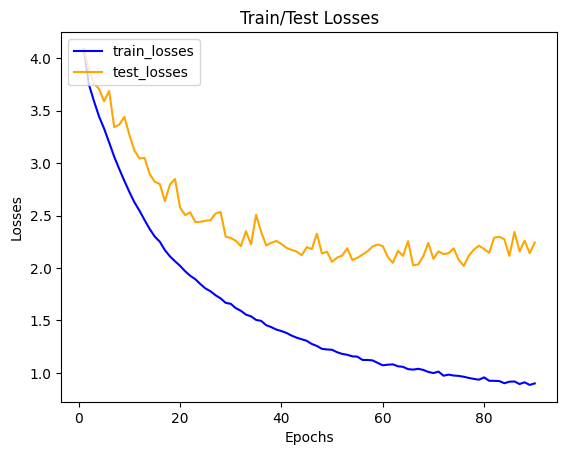

In [8]:
import matplotlib.pyplot as plt

X = [i+1 for i in range(len(train_losses))]

plt.plot(X, train_losses, color="blue", label = "train_losses")
plt.plot(X, test_losses, color="orange", label = "test_losses")

plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend(loc="upper left")
plt.title("Train/Test Losses")

plt.show()

In [ ]:
from metrics.metric import *

model_t = MyResNet18();     t_save_path = "./models/Base_unbalanced.pth"
model_v = MyResNet18();     v_save_path = "./models/Base_balanced.pth"
model_b = MyResNet18();     b_save_path = "./models/Base_balanced.pth"

model_t.load_state_dict(torch.load(t_save_path))
model_v.load_state_dict(torch.load(v_save_path))
model_b.load_state_dict(torch.load(b_save_path))
model_t = model_t.to(device);   model_v = model_v.to(device);   model_b = model_b.to(device)

top_1_acc = top_1_metric(model_t, test_loader, device)
relative_acc = relative_accuracy(model_t, model_v, model_b, test_loader, device)
print(f"[Top-1 Accuracy] {top_1_acc:.4f}")

d:\code\DeepLearningLab\Final_Project\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\code\DeepLearningLab\Final_Project\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[Top-1 Accuracy] 34.3000
